### Gráfica para Inscripciones Mensuales de Miembros

In [325]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [326]:
#leemos el csv
miembros = pd.read_csv('../tablas/miembros.csv', index_col=0)
miembros.head()

,nombre,apellidos,nombreApellidos,movil,codigoPostal,pass,fotoMiembro,fechaInscripcion
0,Esteban,Segura,Esteban Segura,604666433,22336,15931002,miembroh3.png,16/05/2022
1,Wálter,Díaz,Wálter Díaz,692146083,41339,48704007,miembroh3.png,21/04/2022
2,Julieta,Pozo,Julieta Pozo,670338882,24224,35134451,opinion3m.png,05/07/2020
3,Lupita,Olmo,Lupita Olmo,601176618,46369,35883850,opinion3m.png,08/03/2021
4,Toribio,Vendrell,Toribio Vendrell,699110621,41849,39633634,opinion1.png,26/11/2020


In [327]:
#comprobamos nombres de columnas
miembros.columns

Index(['nombre', 'apellidos', 'nombreApellidos', 'movil', 'codigoPostal',
       'pass', 'fotoMiembro', 'fechaInscripcion'],
      dtype='object')

In [328]:
#comprobamos types
miembros.dtypes

nombre              object
apellidos           object
nombreApellidos     object
movil                int64
codigoPostal         int64
pass                 int64
fotoMiembro         object
fechaInscripcion    object
dtype: object

In [329]:
#pasamos la columna de fechas a datetime
miembros['fechaInscripcion'] = pd.to_datetime(miembros['fechaInscripcion'])

In [330]:
#comprobamos el cambio
miembros.dtypes

nombre                      object
apellidos                   object
nombreApellidos             object
movil                        int64
codigoPostal                 int64
pass                         int64
fotoMiembro                 object
fechaInscripcion    datetime64[ns]
dtype: object

In [331]:
#eliminamos las columnas innecesarias
miembros=miembros.drop(['nombre', 'apellidos', 'movil','pass', 'fotoMiembro'], axis=1)
miembros

,nombreApellidos,codigoPostal,fechaInscripcion
0,Esteban Segura,22336,2022-05-16
1,Wálter Díaz,41339,2022-04-21
2,Julieta Pozo,24224,2020-05-07
3,Lupita Olmo,46369,2021-08-03
4,Toribio Vendrell,41849,2020-11-26
...,...,...,...
1235,Estefanía Hernando,16854,2021-05-26
1236,Ángel Jara,2139,2019-11-24
1237,Valentina Benavent,38670,2022-06-01
1238,Heliodoro Planas,15528,2020-07-12


In [332]:
#ordenamos por fecha de inscripcion
miembros.sort_values(by='fechaInscripcion', inplace=True)

In [333]:
#volvemos a pasar las fechas a string
miembros['fechaInscripcion']=miembros['fechaInscripcion'].astype(str)

In [334]:
print(miembros.dtypes)
miembros

nombreApellidos     object
codigoPostal         int64
fechaInscripcion    object
dtype: object


,nombreApellidos,codigoPostal,fechaInscripcion
742,Moisés Parra,31671,2019-01-06
1001,Eligia Amor,29010,2019-01-07
293,Fabiana Guijarro,50400,2019-01-08
1125,Casandra Castejón,26291,2019-01-09
1063,Paulino Roda,5154,2019-01-09
...,...,...,...
249,Rita Pont,46814,2022-12-05
826,Bienvenida Mendez,49334,2022-12-05
263,León Benavent,25353,2022-12-06
525,Maite Rozas,46910,2022-12-06


In [335]:
#eliminamos los dias de la fecha
miembros['fechaInscripcion'] = miembros['fechaInscripcion'].str.slice_replace(7, repl='')

In [336]:
miembros

,nombreApellidos,codigoPostal,fechaInscripcion
742,Moisés Parra,31671,2019-01
1001,Eligia Amor,29010,2019-01
293,Fabiana Guijarro,50400,2019-01
1125,Casandra Castejón,26291,2019-01
1063,Paulino Roda,5154,2019-01
...,...,...,...
249,Rita Pont,46814,2022-12
826,Bienvenida Mendez,49334,2022-12
263,León Benavent,25353,2022-12
525,Maite Rozas,46910,2022-12


In [337]:
#hacemos groupby por meses y contamos la cantidad de personas inscritas
inscripciones_mensuales= miembros.groupby('fechaInscripcion')['nombreApellidos'].count()
inscripciones_mensuales=inscripciones_mensuales.to_frame()
print(inscripciones_mensuales.shape)
inscripciones_mensuales.head(10)

(47, 1)


,nombreApellidos
fechaInscripcion,
2019-01,10
2019-02,5
2019-03,6
2019-04,9
2019-05,27
2019-06,36
2019-07,23
2019-08,20
2019-09,21


In [338]:
#ponemos el indice como columna
inscripciones_mensuales=inscripciones_mensuales.reset_index()
inscripciones_mensuales.head()

,fechaInscripcion,nombreApellidos
0,2019-01,10
1,2019-02,5
2,2019-03,6
3,2019-04,9
4,2019-05,27


In [339]:
#cambiamos el nombre d ela columna
inscripciones_mensuales=inscripciones_mensuales.rename(columns={'nombreApellidos':'nPersonasInscritas'})
print(inscripciones_mensuales.shape)
inscripciones_mensuales=inscripciones_mensuales.iloc[:31, :]
inscripciones_mensuales.tail(10)

(47, 2)


,fechaInscripcion,nPersonasInscritas
21,2020-10,35
22,2020-11,32
23,2020-12,40
24,2021-01,29
25,2021-02,35
26,2021-03,32
27,2021-04,33
28,2021-05,30
29,2021-06,32
30,2021-07,35


In [340]:
#guardamos la tabla como csv
inscripciones_mensuales.to_csv('inscripciones_mensuales_m.csv', index=False)

In [341]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{'secondary_y': False}]])

fig.add_trace(
    go.Scatter(
    x = inscripciones_mensuales['fechaInscripcion'],
    y = inscripciones_mensuales['nPersonasInscritas'],
    name = 'Nº Personas Inscritas',
    mode = 'lines+markers',
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
)

fig.update_layout(
    title_text='Personas Inscritas por Mes'
)

fig.update_xaxes(title_text='Meses de 01/2019 a 12/2022')

fig.update_yaxes(title_text='Nº Personas Inscritas')

fig.show()


In [342]:
fig = px.bar(inscripciones_mensuales, y='nPersonasInscritas', x='fechaInscripcion')

fig.update_xaxes(title_text='Meses de 01/2019 a 12/2022')

fig.update_yaxes(title_text='Nº Miembros Inscritos')

fig.show()

### Modelo de Predicción

In [343]:
#inscripciones_mensuales=inscripciones_mensuales.set_index('fechaInscripcion')
print(inscripciones_mensuales.shape)
inscripciones_mensuales


(31, 2)


,fechaInscripcion,nPersonasInscritas
0,2019-01,10
1,2019-02,5
2,2019-03,6
3,2019-04,9
4,2019-05,27
5,2019-06,36
6,2019-07,23
7,2019-08,20
8,2019-09,21
9,2019-10,34


<AxesSubplot:>

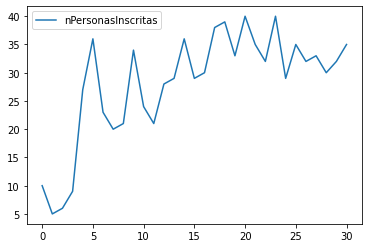

In [344]:
inscripciones_mensuales.plot()

### Preparamos la features del dataset

In [345]:
for i in range(12,0,-1):
    inscripciones_mensuales['t-'+str(i)] = inscripciones_mensuales['nPersonasInscritas'].shift(i)

In [346]:
inscripciones_mensuales.dropna(inplace=True)
inscripciones_mensuales.head(15)

,fechaInscripcion,nPersonasInscritas,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
12,2020-01,28,10.0,5.0,6.0,9.0,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0
13,2020-02,29,5.0,6.0,9.0,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0
14,2020-03,36,6.0,9.0,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0
15,2020-04,29,9.0,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0
16,2020-05,30,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0
17,2020-06,38,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0,30.0
18,2020-07,39,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0,30.0,38.0
19,2020-08,33,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0,30.0,38.0,39.0
20,2020-09,40,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0,30.0,38.0,39.0,33.0
21,2020-10,35,34.0,24.0,21.0,28.0,29.0,36.0,29.0,30.0,38.0,39.0,33.0,40.0


In [347]:
inscripciones_mensuales.tail(25)

,fechaInscripcion,nPersonasInscritas,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
12,2020-01,28,10.0,5.0,6.0,9.0,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0
13,2020-02,29,5.0,6.0,9.0,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0
14,2020-03,36,6.0,9.0,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0
15,2020-04,29,9.0,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0
16,2020-05,30,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0
17,2020-06,38,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0,30.0
18,2020-07,39,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0,30.0,38.0
19,2020-08,33,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0,30.0,38.0,39.0
20,2020-09,40,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0,30.0,38.0,39.0,33.0
21,2020-10,35,34.0,24.0,21.0,28.0,29.0,36.0,29.0,30.0,38.0,39.0,33.0,40.0


In [348]:
inscripciones_mensuales=inscripciones_mensuales.set_index('fechaInscripcion')
print(inscripciones_mensuales.shape)
inscripciones_mensuales

(19, 13)


,nPersonasInscritas,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
fechaInscripcion,,,,,,,,,,,,,
2020-01,28,10.0,5.0,6.0,9.0,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0
2020-02,29,5.0,6.0,9.0,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0
2020-03,36,6.0,9.0,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0
2020-04,29,9.0,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0
2020-05,30,27.0,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0
2020-06,38,36.0,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0,30.0
2020-07,39,23.0,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0,30.0,38.0
2020-08,33,20.0,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0,30.0,38.0,39.0
2020-09,40,21.0,34.0,24.0,21.0,28.0,29.0,36.0,29.0,30.0,38.0,39.0,33.0


### Dividimos en train y test

In [349]:
X = inscripciones_mensuales.iloc[:,1:].values
y = inscripciones_mensuales.iloc[:, 0].values

X_train = X[:15]
X_test = X[15:]
y_train = y[:15]
y_test = y[15:]

print("Shape X_train:", X_train.shape)
print("Shape X_test", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (15, 12)
Shape X_test (4, 12)
Shape y_train: (15,)
Shape y_test: (4,)


In [350]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11
0,29.0,30.0,38.0,39.0,33.0,40.0,35.0,32.0,40.0,29.0,35.0,32.0
1,30.0,38.0,39.0,33.0,40.0,35.0,32.0,40.0,29.0,35.0,32.0,33.0
2,38.0,39.0,33.0,40.0,35.0,32.0,40.0,29.0,35.0,32.0,33.0,30.0
3,39.0,33.0,40.0,35.0,32.0,40.0,29.0,35.0,32.0,33.0,30.0,32.0


### Modelos de predicción

In [351]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [352]:
def prediction(model, x_test):
    preds = x_test[0]
    preds_out = []
    
    for i in range(len(X_test)):
        pred = model.predict([preds])[0]
        preds_out.append(pred)
        
        preds2 = np.array([preds[1:]]) # quitamos t-12 ya no se usa
        
        preds = np.c_[preds2, np.array([pred])][0]
        
    return preds_out

In [353]:
preds = prediction(tree, X_test)
preds

[29.0, 33.0, 32.0, 33.0]

In [354]:
y_test

array([33, 30, 32, 35], dtype=int64)

In [355]:
#Creamos un dataframe con y_test y pred
preds_df=pd.DataFrame(preds)

y_test_df = pd.DataFrame(y_test.tolist())

meses= pd.DataFrame(['Apr', 'May', 'Jun', 'Jul'])

y_test_preds_df=pd.concat([meses, preds_df, y_test_df], axis=1)

y_test_preds_df.columns = ['meses', 'predicciones', 'inscripciones']

y_test_preds_df


,meses,predicciones,inscripciones
0,Apr,29.0,33
1,May,33.0,30
2,Jun,32.0,32
3,Jul,33.0,35


In [356]:
fig = make_subplots(specs=[[{"secondary_y": False}]])

fig.add_trace(
    go.Scatter(
    x = y_test_preds_df['meses'],
    y = y_test_preds_df['inscripciones'],
    name = 'Nº Miembros Inscritos Real',
    mode = 'lines+markers',
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
)
fig.add_trace(
    go.Scatter(
    x = y_test_preds_df['meses'],
    y = y_test_preds_df['predicciones'],
    name = 'Nº Miembros Inscritos Pred',
    mode = 'lines+markers',
    marker = dict(color = 'rgba(30, 26, 255, 0.8)'))
)

fig.update_layout(
    title_text='Predicción a 4 meses de Miembros Inscritos'
)

fig.update_xaxes(title_text='Meses de 04/2022 a 07/2022')

fig.update_yaxes(title_text='Nº Miembros Inscritas')

fig.show()

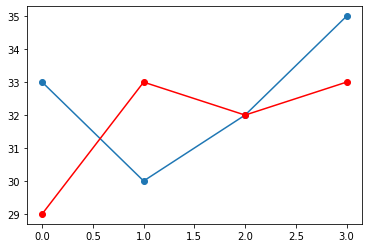

In [357]:
plt.plot(y_test,'o-')
plt.plot(preds,'o-',color='red')

### Random Forest

In [358]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200, max_depth=5)
rfr.fit(X_train, y_train)

preds2 = prediction(rfr, X_test) # tengo que predecir uno a uno
print("MSE:", mean_squared_error(preds2, y_test))

MSE: 5.558910937500002


In [359]:
preds2

[33.5325, 33.725, 34.5075, 33.6625]

In [360]:
#Creamos un dataframe con y_test y pred
preds2_df=pd.DataFrame(preds2)

#y_test_df = pd.DataFrame(y_test.tolist())

#meses= pd.DataFrame(['Apr', 'May', 'Jun', 'Jul'])

y_test_preds2_df=pd.concat([meses, preds2_df, y_test_df], axis=1)

y_test_preds2_df.columns = ['meses', 'predicciones', 'inscripciones']

y_test_preds2_df=y_test_preds2_df.round(0)
y_test_preds2_df

,meses,predicciones,inscripciones
0,Apr,34.0,33
1,May,34.0,30
2,Jun,35.0,32
3,Jul,34.0,35


In [361]:
fig = make_subplots(specs=[[{"secondary_y": False}]])

fig.add_trace(
    go.Scatter(
    x = y_test_preds2_df['meses'],
    y = y_test_preds2_df['inscripciones'],
    name = 'Nº Miembros Inscritos Real',
    mode = 'lines+markers',
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
)
fig.add_trace(
    go.Scatter(
    x = y_test_preds2_df['meses'],
    y = y_test_preds2_df['predicciones'],
    name = 'Nº Miembros Inscritos Pred',
    mode = 'lines+markers',
    marker = dict(color = 'rgba(30, 26, 255, 0.8)'))
)

fig.update_layout(
    title_text='Predicción a 4 meses de Miembros Inscritos'
)

fig.update_xaxes(title_text='Meses de 04/2022 a 07/2022')

fig.update_yaxes(title_text='Nº Miembros Inscritas')

fig.show()

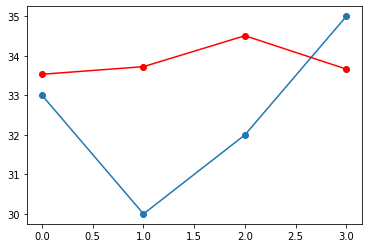

In [362]:
plt.plot(y_test, "o-")
plt.plot(preds2, "o-", color="red")

### Regresión Lineal

In [363]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred1 = lin_reg.predict(X_test) # no hay por qué hacerlo
print("MSE:", mean_squared_error(pred1, y_test))

pred2 = prediction(lin_reg, X_test) # predigo uno a uno
print("MSE:", mean_squared_error(pred2, y_test))

MSE: 94.22302040352855
MSE: 110.27939011561102


In [364]:
#Creamos un dataframe con y_test y pred
pred2_df=pd.DataFrame(pred2)

#y_test_df = pd.DataFrame(y_test.tolist())

#meses= pd.DataFrame(['Apr', 'May', 'Jun', 'Jul'])

y_test_pred2_df=pd.concat([meses, pred2_df, y_test_df], axis=1)

y_test_pred2_df.columns = ['meses', 'predicciones', 'inscripciones']

y_test_pred2_df=y_test_pred2_df.round(0)
y_test_pred2_df

,meses,predicciones,inscripciones
0,Apr,18.0,33
1,May,33.0,30
2,Jun,35.0,32
3,Jul,21.0,35


In [365]:
fig = make_subplots(specs=[[{"secondary_y": False}]])

fig.add_trace(
    go.Scatter(
    x = y_test_pred2_df['meses'],
    y = y_test_pred2_df['inscripciones'],
    name = 'Nº Miembros Inscritos Real',
    mode = 'lines+markers',
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
)
fig.add_trace(
    go.Scatter(
    x = y_test_pred2_df['meses'],
    y = y_test_pred2_df['predicciones'],
    name = 'Nº Miembros Inscritos Pred',
    mode = 'lines+markers',
    marker = dict(color = 'rgba(30, 26, 255, 0.8)'))
)

fig.update_layout(
    title_text='Predicción a 4 meses de Miembros Inscritos'
)

fig.update_xaxes(title_text='Meses de 04/2022 a 07/2022')

fig.update_yaxes(title_text='Nº Miembros Inscritas')

fig.show()

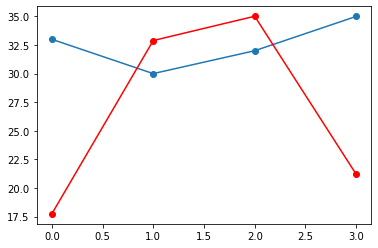

In [366]:
plt.plot(y_test,'o-')
plt.plot(pred2,'o-',color='red')